In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [4]:
dataset = pd.read_csv('GoogleStock Price.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [6]:
training_set = dataset[:'2022'].iloc[:,1:2].values
test_set = dataset['2023':].iloc[:,1:2].values

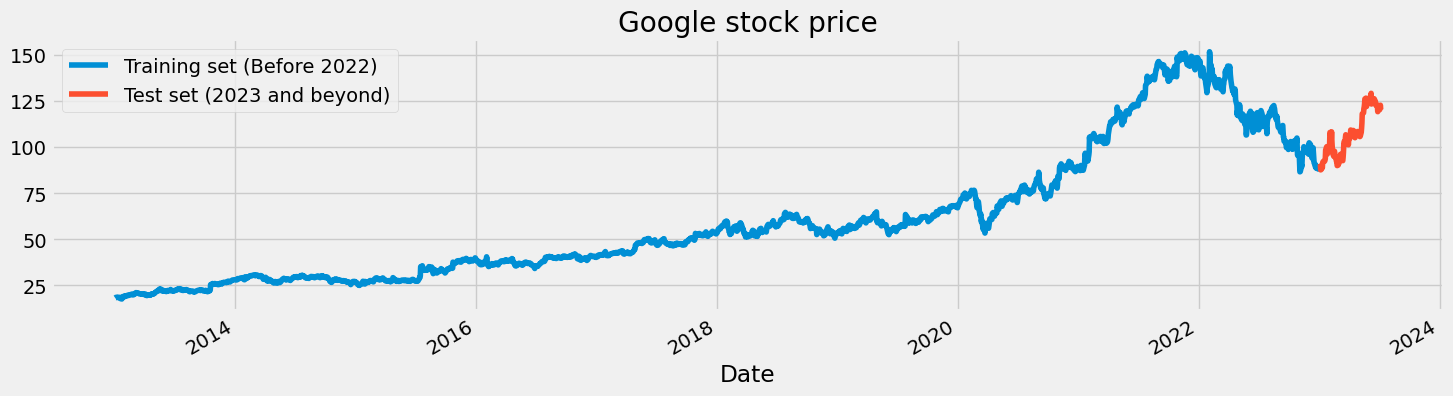

In [8]:
dataset["High"][:'2022'].plot(figsize=(16,4),legend=True)
dataset["High"]['2023':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2022)','Test set (2023 and beyond)'])
plt.title('Google stock price')
plt.show()

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled.shape

(2518, 1)

In [14]:
X_train = []
y_train = []
for i in range(60,2518):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [18]:
X_train.shape

(2458, 60, 1)

In [21]:
# The LSTM architecture
model_lstm = Sequential()
# First LSTM layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Third LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Fourth LSTM layer
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
# The output layer
model_lstm.add(Dense(units=1))

# Compiling the RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
model_lstm.fit(X_train,y_train,epochs=50,batch_size=32)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - loss: 0.0299
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - loss: 0.0064
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - loss: 0.0050
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - loss: 0.0035
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - loss: 0.0034
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 466ms/step - loss: 0.0032
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 309ms/step - loss: 0.0033
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 281ms/step - loss: 0.0026
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/step - loss: 0.0022
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - loss: 0.0023
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 267ms/step - loss: 0.0027
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0023
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - loss: 0.0021
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - loss: 0.0020
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [23]:
dataset_total = pd.concat((dataset["High"][:'2022'],dataset["High"]['2023':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [25]:
inputs.shape

(187, 1)

In [27]:
X_test = []
for i in range(60,187):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 622ms/step


In [29]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

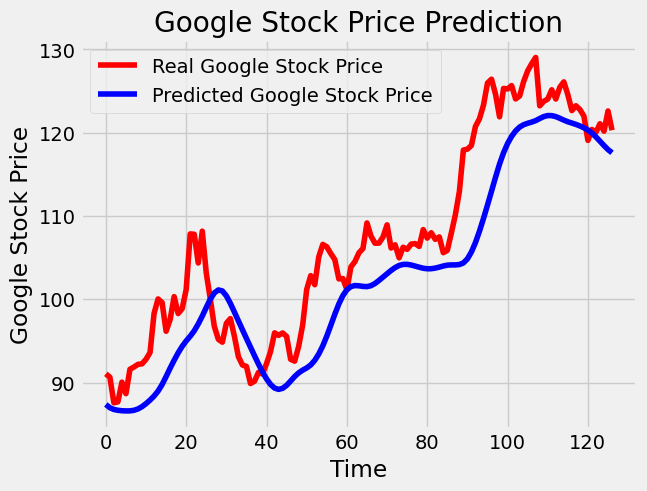

In [31]:
plot_predictions(test_set,predicted_stock_price)

In [33]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 6.277860768280716.


In [35]:
# The GRU architecture
LSTM_GRU = Sequential()
# First GRU layer with Dropout regularisation
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Second GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Third GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Fourth GRU layer
LSTM_GRU.add(GRU(units=50, activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# The output layer
LSTM_GRU.add(Dense(units=1))
# Compiling the RNN
LSTM_GRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
LSTM_GRU.fit(X_train,y_train,epochs=50,batch_size=150)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 510ms/step - loss: 0.1093
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - loss: 0.0510
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - loss: 0.0215
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - loss: 0.0040
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - loss: 0.0034
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - loss: 0.0027
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - loss: 0.0029
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - loss: 0.0031
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - loss: 0.0026
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 434ms/step - loss: 0.0024
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - loss: 0.0024
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - loss: 0.0023
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - loss: 0.0024
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - loss: 0.0024
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 513ms/step -

In [37]:
X_test = []
for i in range(60,187):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = LSTM_GRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step


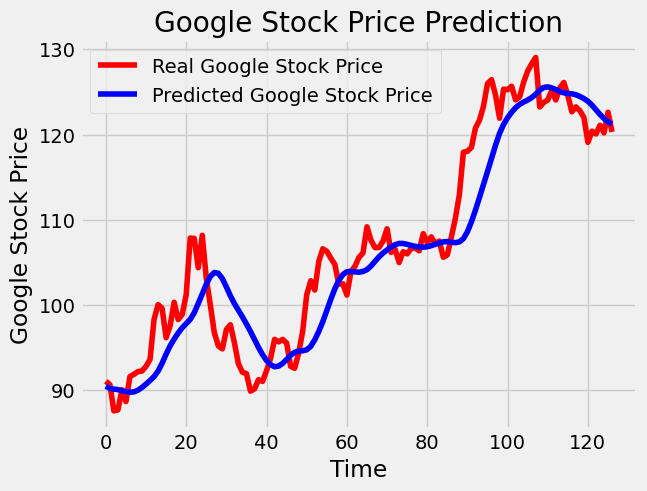

In [39]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [41]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 4.334181631617138.


In [45]:
# Bidirectional LSTM architecture
bid_lstm = Sequential()
# First LSTM layer with Dropout regularisation
bid_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))))
bid_lstm.add(Dropout(0.2))
# Second LSTM layer
bid_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True)))
bid_lstm.add(Dropout(0.2))
# Third LSTM layer
bid_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True)))
bid_lstm.add(Dropout(0.2))
# Fourth LSTM layer
bid_lstm.add(Bidirectional(LSTM(units=50)))
bid_lstm.add(Dropout(0.2))
# The output layer
bid_lstm.add(Dense(units=1))

# Compiling the RNN
bid_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
bid_lstm.fit(X_train,y_train,epochs=50,batch_size=32)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 57s 380ms/step - loss: 0.0184
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - loss: 0.0048
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 357ms/step - loss: 0.0036
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 382ms/step - loss: 0.0026
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 361ms/step - loss: 0.0029
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 376ms/step - loss: 0.0029
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - loss: 0.0022
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 363ms/step - loss: 0.0024
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 389ms/step - loss: 0.0019
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 351ms/step - loss: 0.0015
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 373ms/step - loss: 0.0019
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 362ms/step - loss: 0.0016
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 377ms/step - loss: 0.0016
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 365ms/step - loss: 0.0015
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 

In [47]:
X_test = []
for i in range(60,187):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
BLSTM_predicted_stock_price = bid_lstm.predict(X_test)
BLSTM_predicted_stock_price = sc.inverse_transform(BLSTM_predicted_stock_price)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000029148B3FBA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step 


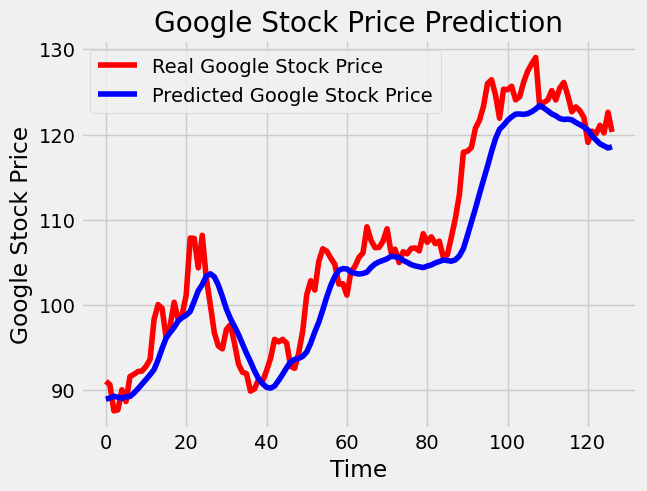

In [49]:
plot_predictions(test_set,BLSTM_predicted_stock_price)

In [51]:
return_rmse(test_set,BLSTM_predicted_stock_price)

The root mean squared error is 4.067126857612116.
